<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/CA_FeatureRanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:
Using Random Forest to estimate the gini index and feature importance for all features from CA dataset

Using Scikit-learn to compute PCA

## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# 1.Load data - Combined CA Data

In [3]:
CA_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA_labeledData_Sep17.csv',low_memory=False)
print(CA_labeled_data.shape)

(9196, 19)


In [4]:
CA_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
dtype: object

## Preprocessing data 

* drop na
* convert categorical code

In [5]:
CA_labeled_data['label_code'] = CA_labeled_data['label'].astype('category').cat.codes

CA_labeled_data.head(2)

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code
0,2020-03-01,6001,Alameda County,6.0,9.0,15.0,1.0,4.0,0.0,-7.65,3.684,58,2261.547725,0,0.0,0,0.0,LessSpread,flat_growth,0
1,2020-03-01,6067,Sacramento County,11.0,4.0,26.0,1.0,2.0,-1.0,-4.63,3.773,53,1608.950489,0,0.0,0,0.0,LessSpread,flat_growth,0


In [6]:
CA_labeled_data = CA_labeled_data.dropna()

In [7]:
CA_labeled_data[pd.isna(CA_labeled_data['label'])]

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code


In [8]:
CA_labeled_data['label_code'].unique()

array([0, 1, 2], dtype=int8)

In [9]:
CA_labeled_data['growth_code'] = CA_labeled_data['growth_label'].astype('category').cat.codes
CA_labeled_data.head()

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
0,2020-03-01,6001,Alameda County,6.0,9.0,15.0,1.0,4.0,0.0,-7.65,3.684,58,2261.547725,0,0.0,0,0.0,LessSpread,flat_growth,0,2
1,2020-03-01,6067,Sacramento County,11.0,4.0,26.0,1.0,2.0,-1.0,-4.63,3.773,53,1608.950489,0,0.0,0,0.0,LessSpread,flat_growth,0,2
2,2020-03-01,6069,San Benito County,2.0,-1.0,-7.0,0.0,0.0,0.0,10.40,3.876,33,45.227585,0,0.0,0,0.0,LessSpread,flat_growth,0,2
3,2020-03-01,6071,San Bernardino County,5.0,-2.0,-22.0,2.0,-1.0,0.0,10.34,4.508,57,108.694796,0,0.0,0,0.0,LessSpread,flat_growth,0,2
4,2020-03-01,6073,San Diego County,2.0,-1.0,-20.0,-4.0,2.0,0.0,-4.99,4.555,59,793.587741,0,0.0,0,0.0,LessSpread,flat_growth,0,2


In [10]:
CA_labeled_data['growth_code'].unique()

array([2, 3, 4, 0, 1], dtype=int8)

In [11]:
CA_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
label_code                  int8
growth_code                 int8
dtype: object

In [12]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['label_code']

X = CA_labeled_data[feature_labels]
y = CA_labeled_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Train Random Forest classifier

In [13]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('retail and recreation', 0.11404503482729024)
('grocery and pharmacy', 0.0977353017159239)
('parks', 0.08304739743750444)
('transit stations', 0.07089533985243181)
('workplaces', 0.08453766703056341)
('residential', 0.06283150630172737)
('driving', 0.18430359774293176)
('m50', 0.10379536502744927)
('m50_index', 0.08638292041145693)
('population_density', 0.10282015610054916)
('mask_rule_active', 0.009605713552171631)


In [14]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.10842744959745582)
('grocery and pharmacy', 0.08938669389635209)
('parks', 0.08587410764814926)
('transit stations', 0.06943167774920254)
('workplaces', 0.0755698414533044)
('residential', 0.06139540186683856)
('driving', 0.20793673090710485)
('m50', 0.08934462864895355)
('m50_index', 0.07379536718664355)
('population_density', 0.11859726524794632)
('mask_rule_active', 0.02024083579804911)


## PCA Computation

In [15]:
print(len(feature_labels))

11


In [16]:
# split into training and testing datasets


X = CA_labeled_data[feature_labels].values
y = CA_labeled_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train)
print(y_train)

[[  0.           0.         -19.         ...  40.          27.63595894
    0.        ]
 [-36.          -8.         -15.         ...  39.          47.69825714
    0.        ]
 [  2.           7.          14.         ...  94.          24.52991607
    0.        ]
 ...
 [-37.         -15.         -29.         ...  42.         167.69094946
    0.        ]
 [-34.         -14.         -12.         ...   8.         110.07470743
    0.        ]
 [-32.          -3.          23.         ...  52.         313.69483136
    0.        ]]
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [17]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
principalDf

,principal component 1,principal component 2
0,1484.211987,12.154369
1,831.609744,5.251019
2,-731.962746,-20.095525
3,-668.548597,3.819142
4,16.412827,6.835767
...,...,...
9177,-704.331544,27.927847
9178,1696.922797,4.767738
9179,-691.794582,28.715759
9180,-771.717397,65.912923


In [20]:
finalDf = pd.concat([principalDf, CA_labeled_data[target_column]],axis=1 )
finalDf

,principal component 1,principal component 2,label_code
0,1484.211987,12.154369,0.0
1,831.609744,5.251019,0.0
2,-731.962746,-20.095525,0.0
3,-668.548597,3.819142,0.0
4,16.412827,6.835767,0.0
...,...,...,...
9191,NaN,NaN,0.0
9192,NaN,NaN,0.0
9193,NaN,NaN,0.0
9194,NaN,NaN,0.0


0
1
2


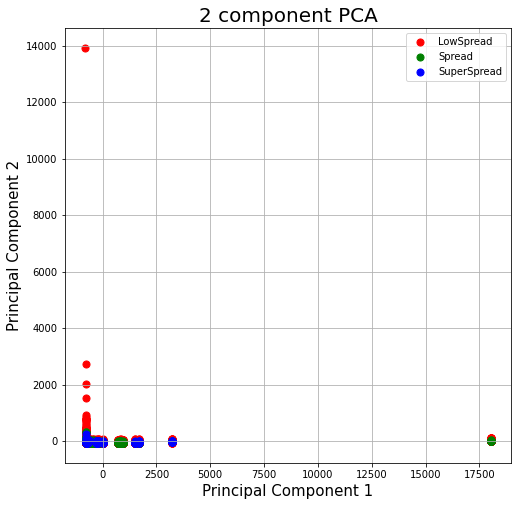

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LowSpread', 'Spread', 'SuperSpread']
targets2 = np.unique(y_train)
colors = ['r', 'g', 'b']
for target, color in zip(targets2,colors):
    print(target)
    indicesToKeep = finalDf['label_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
#obtain the eigenpairs of the Wine covariance matrix:
#data_cov = np.dot(np.transpose(data.values),data.values)
#data_cov
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [23]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[4.68190471 1.74653449 1.46032377 0.80300952 0.64539697 0.54509859
 0.37669832 0.0825042  0.27613096 0.23293532 0.15117495] -> eigenvalues
[42.55614759 15.87511586 13.27360507  7.29895067  5.86633225  4.95467068
  3.42399731  0.74992146  2.50989083  2.11726438  1.37410389]  -> percent of variability explained


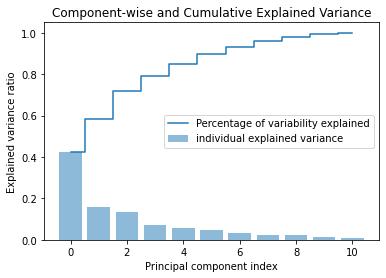

In [24]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(0,11), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,11), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(w[i]), v[:, i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W2:\n', w2)

Matrix W2:
 [[ 0.39802686  0.07548609]
 [ 0.36806604  0.09620801]
 [ 0.21207444  0.10891566]
 [ 0.37897478  0.08480521]
 [ 0.34828846  0.07030567]
 [-0.39530182 -0.08205423]
 [ 0.33752331  0.0546998 ]
 [ 0.20123608 -0.66139603]
 [ 0.1330275  -0.7067886 ]
 [-0.21066697 -0.08990957]
 [ 0.15310568  0.07902472]]


In [26]:
X_train_pca = X_train_std.dot(w2)
print(X_train_pca)

[[ 1.02907231  0.50060721]
 [-1.17610228 -0.16989335]
 [ 2.36704187 -0.15435181]
 ...
 [-1.95580732 -0.42506671]
 [-1.43175017  0.1959066 ]
 [-0.56951383 -0.15928261]]


In [27]:
np.unique(y_train)
X_train_pca

array([[ 1.02907231,  0.50060721],
       [-1.17610228, -0.16989335],
       [ 2.36704187, -0.15435181],
       ...,
       [-1.95580732, -0.42506671],
       [-1.43175017,  0.1959066 ],
       [-0.56951383, -0.15928261]])

# 2.Load data - Maryland Inertia Data

In [28]:
CA_inertia_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA_sd_inertia_labeledData_Sep17.csv',low_memory=False)
print(CA_inertia_labeled_data.shape)

(12296, 56)


In [29]:
CA_inertia_labeled_data.dtypes

Date                                           object
Province_State                                 object
FIPS                                            int64
New cases                                       int64
mask_rule_active                                int64
CTFIPS                                          int64
CTNAME                                         object
STFIPS                                          int64
Social distancing index                         int64
% staying home                                  int64
Trips/person                                  float64
% out-of-county trips                         float64
% out-of-state trips                          float64
Miles/person                                  float64
Work trips/person                             float64
Non-work trips/person                         float64
New COVID cases                                 int64
Population                                      int64
% change in consumption     

## Preprocessing data 

* drop na
* convert categorical code

In [30]:
CA_inertia_labeled_data['label_code'] = CA_inertia_labeled_data['label'].astype('category').cat.codes

CA_inertia_labeled_data.head(2)

,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label,growth_label,label_code
0,2020-01-22,California,6001,0,0,6001,Alameda County,6,18,20,3.29,29.4,0.3,35.9,0.55,2.74,0,1666753,-2.9,2020-01-22,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0
1,2020-01-22,California,6041,0,0,6041,Marin County,6,15,20,3.42,27.8,0.1,42.3,0.52,2.90,0,259666,2.5,2020-01-22,9.51,28,110217,2.2,15.9,48.83,314,308,218,2.05,0.22,0.0,0.0,73,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0


In [31]:
CA_inertia_labeled_data = CA_inertia_labeled_data.dropna()

In [32]:
CA_inertia_labeled_data[pd.isna(CA_inertia_labeled_data['label'])]

,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label,growth_label,label_code


In [33]:
CA_inertia_labeled_data['label_code'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int8)

In [34]:
CA_inertia_labeled_data['growth_code'] = CA_inertia_labeled_data['growth_label'].astype('category').cat.codes
CA_inertia_labeled_data.head()

,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
0,2020-01-22,California,6001,0,0,6001,Alameda County,6,18,20,3.29,29.4,0.3,35.9,0.55,2.74,0,1666753,-2.9,2020-01-22,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,1
1,2020-01-22,California,6041,0,0,6041,Marin County,6,15,20,3.42,27.8,0.1,42.3,0.52,2.90,0,259666,2.5,2020-01-22,9.51,28,110217,2.2,15.9,48.83,314,308,218,2.05,0.22,0.0,0.0,73,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,1
2,2020-01-22,California,6039,0,0,6039,Madera County,6,18,17,3.55,29.7,0.1,39.9,0.52,3.03,0,157672,1.5,2020-01-22,0.45,19,52884,3.1,57.3,48.18,72,29,81,2.05,0.22,0.0,0.0,12,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,1
3,2020-01-22,California,6103,0,0,6103,Tehama County,6,18,19,3.47,30.1,1.9,50.6,0.55,2.93,0,63916,5.1,2020-01-22,0.33,26,42899,0.7,24.7,49.71,21,6,106,2.05,0.22,0.0,0.0,59,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,1
4,2020-01-22,California,6037,0,0,6037,Los Angeles County,6,18,19,3.34,10.9,0.3,32.5,0.62,2.72,0,10105518,-1.7,2020-01-22,6.04,18,64251,7.9,48.5,49.28,2125,972,140,2.05,0.22,0.0,0.0,9,0.0,1.2,3.9,5.7,0.3,54.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,1


In [35]:
CA_inertia_labeled_data['growth_code'].unique()

array([1, 2, 3, 0], dtype=int8)

In [36]:
CA_inertia_labeled_data.dtypes

Date                                           object
Province_State                                 object
FIPS                                            int64
New cases                                       int64
mask_rule_active                                int64
CTFIPS                                          int64
CTNAME                                         object
STFIPS                                          int64
Social distancing index                         int64
% staying home                                  int64
Trips/person                                  float64
% out-of-county trips                         float64
% out-of-state trips                          float64
Miles/person                                  float64
Work trips/person                             float64
Non-work trips/person                         float64
New COVID cases                                 int64
Population                                      int64
% change in consumption     

In [37]:
CA_inertia_labeled_data.columns

Index(['Date', 'Province_State', 'FIPS', 'New cases', 'mask_rule_active',
       'CTFIPS', 'CTNAME', 'STFIPS', 'Social distancing index',
       '% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person', 'New COVID cases', 'Population',
       '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people',
       '# contact tracing workers/1000 people rank',
       '% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate',
       '% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity',
   

In [38]:
feature_labels = ['mask_rule_active','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person','Non-work trips/person','% change in consumption',
       'Transit mode share','% people older than 60', 'Median income', '% African Americans', '% Hispanic Americans',
       '% Male', 'Population density','Employment density', '# hot spots/1000 people','Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people rank','% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate','% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity','Tests done/1000 people', '% ICU utilization', 'Ventilator shortage'
       ]

target_column = ['label_code']

X = CA_inertia_labeled_data[feature_labels]
y = CA_inertia_labeled_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Train Random Forest classifier

In [39]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('mask_rule_active', 0.0046779757124752845)
('Social distancing index', 0.019429283721131917)
('% staying home', 0.018370906069028914)
('Trips/person', 0.02128267415154293)
('% out-of-county trips', 0.04344262415403291)
('% out-of-state trips', 0.02934294202207859)
('Miles/person', 0.02826989592978061)
('Work trips/person', 0.020498481322269148)
('Non-work trips/person', 0.022338588502385005)
('% change in consumption', 0.022757448023951576)
('Transit mode share', 0.04444429419307492)
('% people older than 60', 0.04250859121335983)
('Median income', 0.04436345486954704)
('% African Americans', 0.03276473716867501)
('% Hispanic Americans', 0.049785702148910184)
('% Male', 0.05301662606911807)
('Population density', 0.05143355350680487)
('Employment density', 0.05077159546854234)
('# hot spots/1000 people', 0.03626578608769184)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.042339842360402

In [40]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
print(X_train.shape)
# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(7352, 33)
('mask_rule_active', 0.005631300918691075)
('Social distancing index', 0.013586112257437789)
('% staying home', 0.012773980544647361)
('Trips/person', 0.014243660668561036)
('% out-of-county trips', 0.03834616864065094)
('% out-of-state trips', 0.02762249640476449)
('Miles/person', 0.02246491184203249)
('Work trips/person', 0.014076770918171633)
('Non-work trips/person', 0.015929068828691238)
('% change in consumption', 0.016839076746991817)
('Transit mode share', 0.04769183317732047)
('% people older than 60', 0.03851257352998927)
('Median income', 0.04594299624737143)
('% African Americans', 0.03212927579508459)
('% Hispanic Americans', 0.0468768086825594)
('% Male', 0.05222847928027471)
('Population density', 0.054504797574647205)
('Employment density', 0.05395864495475357)
('# hot spots/1000 people', 0.0345908845603549)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.038352

In [41]:
X_train.shape

(7352, 33)

## PCA Computation

In [42]:
print(len(feature_labels))

33


In [43]:
# split into training and testing datasets


X = CA_inertia_labeled_data[feature_labels].values
y = CA_inertia_labeled_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train)
print(y_train)

[[1.0000e+00 4.4000e+01 2.7000e+01 ... 1.1510e+02 2.1650e+01 6.7700e+02]
 [1.0000e+00 3.8000e+01 2.8000e+01 ... 2.0997e+02 2.3880e+01 1.1690e+03]
 [0.0000e+00 6.6000e+01 4.0000e+01 ... 6.1460e+01 1.4920e+01 5.7000e+02]
 ...
 [0.0000e+00 3.5000e+01 2.5000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.2000e+01 3.1000e+01 ... 1.5250e+01 1.7340e+01 6.5700e+02]
 [0.0000e+00 7.2000e+01 4.4000e+01 ... 6.5600e+00 1.7090e+01 6.6000e+02]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [44]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [46]:
principalDf

,principal component 1,principal component 2
0,28302.319654,1057.801319
1,45885.232084,-1318.315048
2,-11434.938131,-53.079277
3,-21417.520176,173.025836
4,-9.170724,1862.338141
...,...,...
12249,-368.149574,-118.249366
12250,-11050.796609,-132.965676
12251,20031.062078,-753.626655
12252,20425.140796,-827.276356


In [47]:
finalDf = pd.concat([principalDf, CA_inertia_labeled_data[target_column]],axis=1 )
finalDf

,principal component 1,principal component 2,label_code
0,28302.319654,1057.801319,0.0
1,45885.232084,-1318.315048,0.0
2,-11434.938131,-53.079277,0.0
3,-21417.520176,173.025836,0.0
4,-9.170724,1862.338141,0.0
...,...,...,...
12291,NaN,NaN,0.0
12292,NaN,NaN,0.0
12293,NaN,NaN,0.0
12294,NaN,NaN,0.0


0
1
2


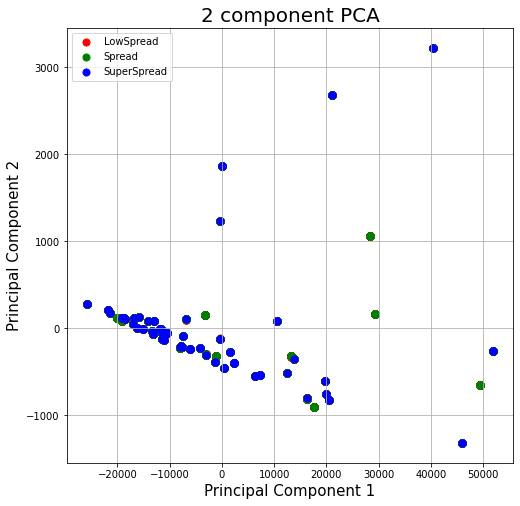

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LowSpread', 'Spread', 'SuperSpread']
targets2 = np.unique(y_train)
colors = ['r', 'g', 'b']
for target, color in zip(targets2,colors):
    print(target)
    indicesToKeep = finalDf['label_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [49]:
#obtain the eigenpairs of the Wine covariance matrix:
#data_cov = np.dot(np.transpose(data.values),data.values)
#data_cov
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [50]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[6.74145823e+00 5.75030096e+00 4.14188612e+00 3.03704005e+00
 1.63435905e+00 1.53175056e+00 1.18678274e+00 1.04036953e+00
 7.16557132e-01 6.50683554e-01 5.90176535e-01 5.20427323e-01
 4.50411362e-01 4.13690339e-01 3.56085335e-01 2.89448561e-01
 2.00449524e-01 1.95188381e-01 1.30501774e-01 1.07518871e-01
 8.30179027e-02 8.10024287e-02 5.49462840e-02 3.43888675e-02
 2.41858184e-02 6.18808182e-05 3.72144523e-03 1.76676324e-02
 8.65378556e-03 1.07661722e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00] -> eigenvalues
[2.24689075e+01 1.91654351e+01 1.38046774e+01 1.01222865e+01
 5.44722832e+00 5.10523992e+00 3.95548123e+00 3.46749411e+00
 2.38824529e+00 2.16869230e+00 1.96702575e+00 1.73455549e+00
 1.50119616e+00 1.37880702e+00 1.18681273e+00 9.64716046e-01
 6.68087180e-01 6.50552079e-01 4.34955197e-01 3.58354451e-01
 2.76694079e-01 2.69976615e-01 1.83132926e-01 1.14616194e-01
 8.06099953e-02 2.06245345e-04 1.24033711e-02 5.88852418e-02
 2.88425887e-02 3.58830566e-02 0.00000000e+00 0.00000

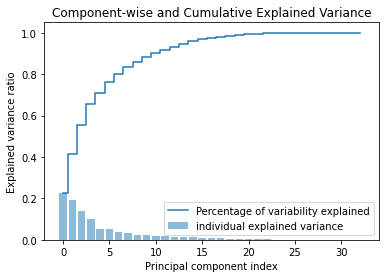

In [51]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(0,33), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,33), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [52]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(w[i]), v[:, i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W2:\n', w2)

Matrix W2:
 [[ 0.20557639 -0.24887588]
 [ 0.24898512  0.27388662]
 [ 0.24306277  0.26782167]
 [-0.22526388 -0.2518293 ]
 [ 0.02510662 -0.07804775]
 [ 0.02226508 -0.03748149]
 [-0.04687539 -0.26387877]
 [-0.22820154 -0.01678148]
 [-0.17026964 -0.28020473]
 [-0.15977308 -0.2804346 ]
 [ 0.08819499  0.1693746 ]
 [ 0.00757221 -0.05984821]
 [ 0.0855534   0.16748428]
 [ 0.0176407   0.08005517]
 [-0.03967367 -0.01111284]
 [-0.01317277 -0.04341505]
 [ 0.08515242  0.18912137]
 [ 0.09038561  0.19208488]
 [ 0.06435948  0.0578587 ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.0044419  -0.06506623]
 [ 0.22982818 -0.2702898 ]
 [ 0.19109433  0.14989808]
 [ 0.29677316 -0.16142289]
 [ 0.32643622 -0.02139502]
 [-0.01771375 -0.11489284]
 [ 0.29403112 -0.18949335]
 [ 0.12434153  0.13945553]
 [ 0.23690239 -0.27867175]
 [ 0.31588643 -0.1847491 ]
 [ 0.31160544 -0.20484769]]


In [53]:
X_train_pca = X_train_std.dot(w2)
print(X_train_pca)

[[ 1.45358628 -1.0303489 ]
 [ 3.5555724  -1.08924587]
 [ 3.96451167  2.57510508]
 ...
 [-3.32973673  0.96328197]
 [ 1.35756268  1.86474401]
 [ 3.59920626  4.80550456]]


In [54]:
np.unique(y_train)
X_train_pca

array([[ 1.45358628, -1.0303489 ],
       [ 3.5555724 , -1.08924587],
       [ 3.96451167,  2.57510508],
       ...,
       [-3.32973673,  0.96328197],
       [ 1.35756268,  1.86474401],
       [ 3.59920626,  4.80550456]])